# Project: Investigate a Movie Dataset (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have decided to do an analysis of the TMDb movie dataset.  This dataset includes a list of around 10,000 movies and attributes such as genre, cast, budget, etc.

I plan on manipulating the data to answer these questions:

>What year had the highest average rating?

>What was the average budget over each year?

>What is the average runtime of a movie?

>Does budget affect a movie's rating?

In [1]:
#importing all packages needed for analyzing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
#'magic word' to help plot data visually
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

We are loading the first few rows of the dataset to determine what information will be absolutely necessary to answer the proposed questions.


In [2]:
#reads csv file, assigning variable
tmdb_dataset = pd.read_csv('tmdb-movies.csv')

#prints only the first five rows of the csv
tmdb_dataset.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Determining Relevant Data

If we go back and read the questions we have and look for keywords:

>What **year** had the highest average **rating**?

>What was the average **budget** over each year?

>What is the average **runtime** of a **movie**?

>Does **budget** affect a **movie's** **rating**?


We can notice that my main keywords are budget, rating, year, profit, runtime, and movie(title).  These are the columns we are wanting to keep for analysis, so the many other columns will be removed to provide a much cleaner interface.


## Data Cleaning

We are removing every column that isn't necessary for our analysis. Since there are multiple columns to delete, we will create a list to delete them all at once.

In [3]:
#First we create a copy of the dataset to preserve the original
clean_data = tmdb_dataset.copy()

#list of columns to delete
columns_to_remove = ['id', 'imdb_id', 'popularity', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'overview', 'genres', 'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj', 'keywords']

#create new dataset with relevant information.  Since it will eventually be our refined and clean data, we will name it clean_data.
clean_data = clean_data.drop(columns_to_remove, 1)

#return first five rows of data to ensure deletion was successful
clean_data.head()

,budget,original_title,runtime,vote_average,release_year
0,150000000,Jurassic World,124,6.5,2015
1,150000000,Mad Max: Fury Road,120,7.1,2015
2,110000000,Insurgent,119,6.3,2015
3,200000000,Star Wars: The Force Awakens,136,7.5,2015
4,190000000,Furious 7,137,7.3,2015


The first five rows have been printed like we did earlier but this time it has created a much easier table to read with all of the irrelevant information removed.

We aren't quite done with cleaning the data table.  We want to make sure there aren't any entries that are duplicates or have any blank entries because that could potentially skew our results for our future analysis of the data.

First, we want to know the current total number of entries in our dataset so that if we delete any duplicates, it will show us if we removed any duplicates.



In [4]:
#finding the current number of entries

len(clean_data.index)

10866

We see that there are 10,866 entries in our current table.  Now let's remove any duplicates if there are any.

In [5]:
#First we always create a copy of the dataset to preserve each section's dataset
cl_data = clean_data.copy()

#removing duplicates and keeping first occurrence, if any.
cl_data.drop_duplicates(keep='first', inplace = True)

#checking number of entries again
len(cl_data.index)

10865

It looks like there was one duplicate in the dataset.  Now we want to look for anything that may have a 0 value. After ordering the csv file from smallest to largest and doing a quick glance over the remaining columns, there were multiple 0 values for budget and runtime. This would greatly impact our results later in the investigation.  We will remove these values and replace them with NaN(not a number). This will make it easier to remove rows with missing data.  Then the rows with a NaN value will be removed.

In [6]:
#First we always create a copy of the dataset to preserve each section's dataset
cl_data2 = cl_data.copy()

#Creating a list of values that have at least one 0 value
zero_values = ['budget', 'runtime']

#Replacing any 0 values with NaN(not a number)
cl_data2[zero_values] = cl_data2[zero_values].replace(0, np.NaN)

#Since NaN values could skew our future analysis, we will remove the rows completely  
#subset = list values to drop
#inplace = if NaN is included in the value
cl_data2.dropna(subset = zero_values, inplace = True)

#Checking our number of entries one last time
len(cl_data2.index)





5166

After cleaning our data even further, it looks like 5,166 movies remain and will be the focus of our data analysis.

One last thing we want to check is the datatype of each column.  This is to make sure everything is correct so our formulas return the proper outcome.

In [7]:
#Prints a list of columns and their current datatypes
cl_data2.dtypes

budget            float64
original_title     object
runtime           float64
vote_average      float64
release_year        int64
dtype: object

For convenience, we will change budget and runtime to integers.  That way budget is easier to read and runtime rounds to the nearest minute.

In [8]:
#First we always create a copy of the dataset to preserve each section's dataset
cl_data3 = cl_data2.copy()

#create a list of columns that will have their datatypes changed
float_to_int = ['budget', 'runtime']

#use the applymap function to convert them to an integer
cl_data3[float_to_int] = cl_data3[float_to_int].applymap(np.int64)

#Let's check the updated data types
cl_data3.dtypes

budget              int64
original_title     object
runtime             int64
vote_average      float64
release_year        int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

Now it is time for us to dig into the clean data we have and analyze our findings.  

### Research Question 1:  What year had the highest average rating?

For this question, I will first be separating all of the movie data by their release year.

In [9]:
#Separating the data by year and finding the mean(average) rating for each year
movies_by_year = cl_data3.groupby('release_year')['vote_average'].mean() 

#To keep it clean, we will round the average rating to the nearest tenth just like the original ratings from the dataset
#We will also display the first five years to make sure the data displays correctly

movies_by_year.round(1).head()


release_year
1960    7.0
1961    6.6
1962    6.7
1963    6.5
1964    6.8
Name: vote_average, dtype: float64

Now that each year correctly shows their average rating, let's go ahead and display the year with the highest average rating.

In [10]:
#finding the maximum column value of vote_average
movies_by_year.idxmax()

1960

So 1960 has the highest average rating with a 7.0.  Let's get a better visual by plotting this on a graph.

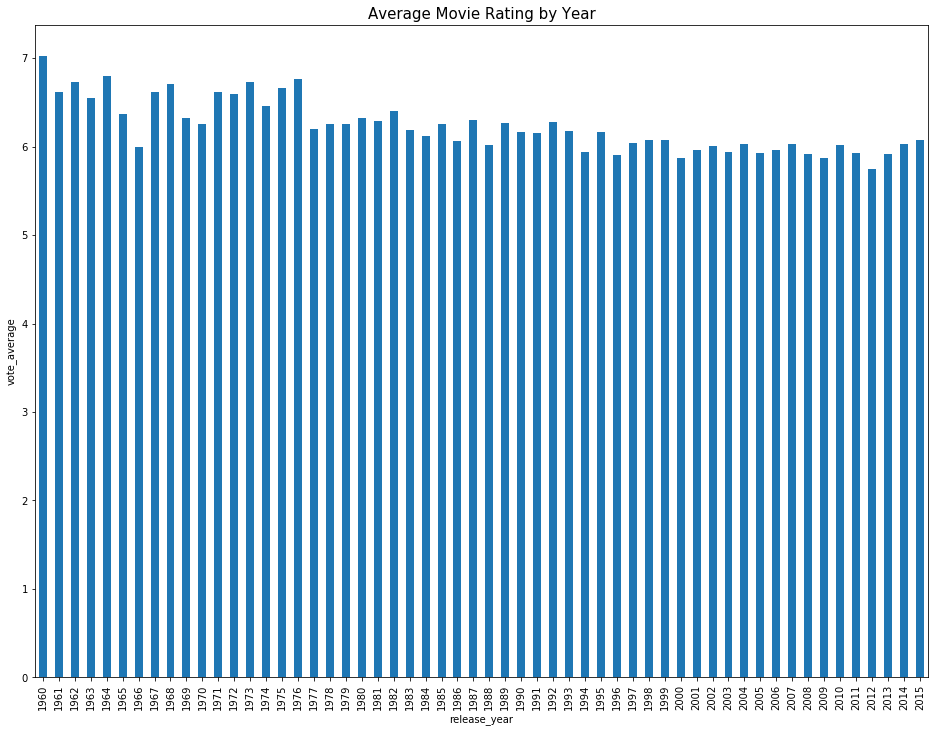

In [11]:
#Customizing the size of the graph
plt.figure(figsize = (16, 12))

#Placing a title and its font size
plt.title('Average Movie Rating by Year', fontsize = 15)

#Changing font size of labels
plt.xlabel("release_year", fontsize = 10)
plt.ylabel('vote_average', fontsize = 10)


#Plotting our movie_profits dataframe as a bar graph and displaying results
movies_by_year.plot(x = 'release_year', kind = 'bar')
plt.show()


As shown by the graph, the bar depicting 1960 is visually higher than every other year.  This accurately paints a picture of the year with the highest average rating.  Over the course of the timeline, the ratings are very similar, staying in the range between 6 and 7 with a couple exceptions.

### Research Question 2: What was the average budget over each year?

To answer this question, we will modify the dataframe to split the data into release year just like we did above. This time, however, our additional column will be budget.

This will be represented as a line graph to show the budget changes over the years.

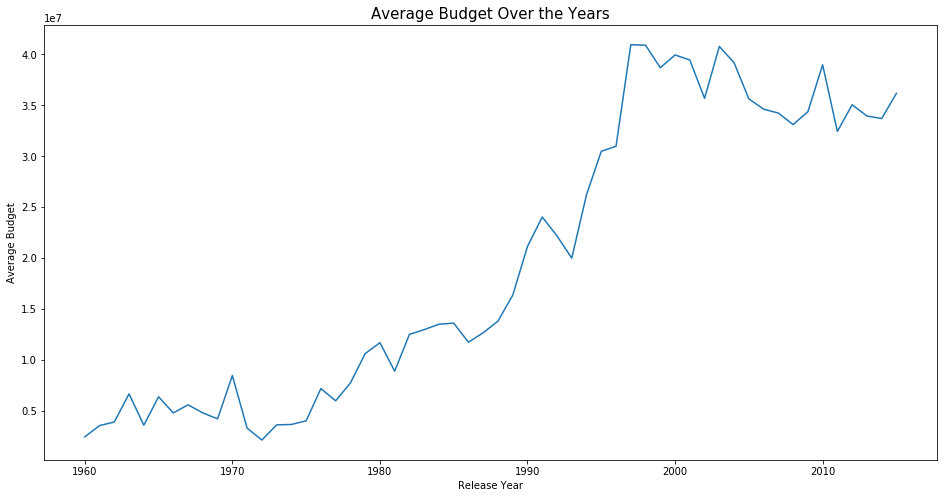

In [12]:
#We will first grab the release year and budget from our dataframe and find the average budget for each year
movie_profits = cl_data3.groupby('release_year')['budget'].mean()

#Next we will display the results as a line graph to show the changes over time

#Customizing the size of the graph
plt.figure(figsize = (16, 8))

#Placing a title and its font size
plt.title('Average Budget Over the Years', fontsize = 15)

#Renaming the x and y axis for a cleaner display, font size the same as the bar graph
plt.xlabel('Release Year', fontsize = 10)
plt.ylabel('Average Budget', fontsize = 10)

#Plotting our movie_profits dataframe and displaying the results
plt.plot(movie_profits)
plt.show()


Since movie budget numbers can be in the hundreds of millions, the budget has been simplified to display smaller numbers on the graph.  The 1e7 at the top left of the graph just shows that it omits some of the zeros in the numbers.  The graph is still an accurate representation of the budget over the years.  

Just by looking at the graph, it does show a sharp increase of a movie's budget from 1970 to the early 2000s.  After the 2000s, it looks as though the budget tries to even out with occasional dips through 2015.  

### Research Question 3: What is the average runtime of a movie?

To find the average runtime,  we can take our data and find the mean of all the runtimes.  This will also be similar to how we calculated averages previously.

In [13]:
#Finding the mean(average) runtime for every movie in our dataframe
cl_data3['runtime'].mean()


107.15834301200155

If we rounded to the nearest whole number, it appears that the average runtime of a movie between 1960 and 2015 is around 107 minutes. 


The average runtime of a movie can be visually shown in many ways.  For this one, we will use a line graph to see how it changed over time.


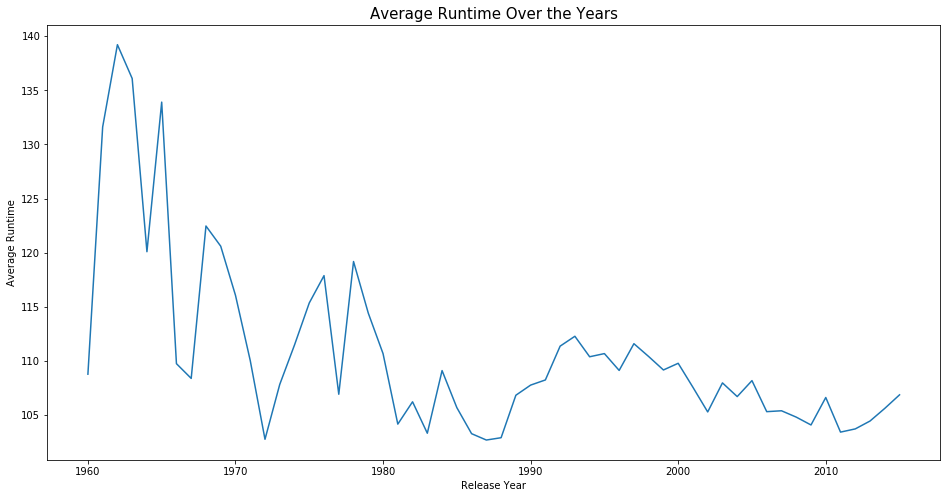

In [14]:
#We will first grab the release year and runtime from our dataframe and find the average runtime for each year
movie_runtime = cl_data3.groupby('release_year')['runtime'].mean()

#Next we will display the results as a line graph to show the changes over time

#Customizing the size of the graph
plt.figure(figsize = (16, 8))

#Placing a title and its font size
plt.title('Average Runtime Over the Years', fontsize = 15)

#Renaming the x and y axis for a cleaner display, font size the same as the line graph
plt.xlabel('Release Year', fontsize = 10)
plt.ylabel('Average Runtime', fontsize = 10)

#Plotting our movie_runtime dataframe and displaying the results
plt.plot(movie_runtime)
plt.show()

This graph was not what I was expecting and that's what is so great about analyzing data.  Finding the answer is one thing, but when you visualize it in a graph, you never know what can happen.  

It looks as though in the 1960s movies were generally longer than later years.  This could raise the possibility of film makers realizing that people are more attentive through a shorter movie?  It can be interpreted in many ways.

### Final Question: Does budget affect a movie's rating?

This question will be a little different than the previous three.  We need to see what the correlation is between budget and vote average.  A scatter plot will be perfect to help answer this because they are specifically used to show how much one variable is affected by another.

First we will create a list showing both a movie's budget and their vote average.

In [15]:
#Creating a list of budget and the vote average associated with it
budget_and_rating = cl_data3[['budget', 'vote_average']]

#Displaying the first five results to make sure it was created correctly
budget_and_rating.head()

,budget,vote_average
0,150000000,6.5
1,150000000,7.1
2,110000000,6.3
3,200000000,7.5
4,190000000,7.3


It looks like our list is ready to be plotted. Again, A scatter plot will be perfect to help answer this because they are specifically used to show how much one variable is affected by another.

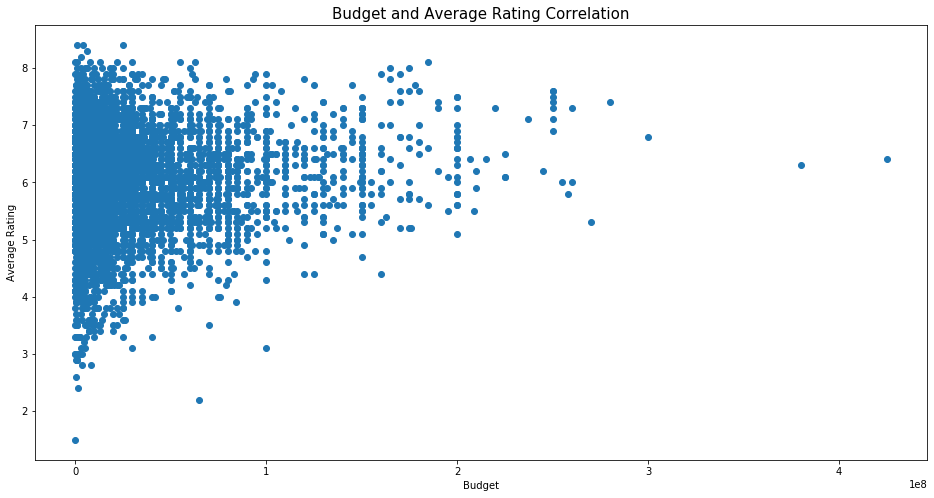

In [16]:


plt.figure(figsize = (16, 8))
#Giving labels for title, x, and y then changing their font size
plt.title('Budget and Average Rating Correlation', fontsize = 15)
plt.xlabel('Budget', fontsize = 10)
plt.ylabel('Average Rating', fontsize = 10)

#plotting the dataframe
plt.scatter(budget_and_rating.budget, budget_and_rating.vote_average)
plt.show()


Let's calculate the actual correlation.

In [17]:
#Correlation of the two variables
budget_and_rating.corr()

,budget,vote_average
budget,1.000000,0.091485
vote_average,0.091485,1.000000


According to the data, there seems to be no correlation between the two.  The number is so close to 0 and indicates that there probably isn't much of a relationship at all.

<a id='conclusions'></a>
## Conclusions

Let's review.

**Question 1: What year had the highest average rating?**

**Question 2:  What was the average budget over each year?**

**Question 3:  What is the average runtime of a movie?**

**Question 4:  Does budget affect a movie's rating?**

After analyzing the data to better answer these questions, we found answers that could give general representations as to why the output was given. For example, question 1 returned 1960 as the year with the highest average rating.  We could have gone much deeper into the numbers and analyzed how many movies were released each year and factor that into our approach.

There are so many variables that could affect the outcome of an analyzation.  For this project, the results we obtained were on more of a basic understanding of how to analyze data.  Just like question 1, we could go into much more depth to further answer the other questions, so the results are limited to what was learned throughout the course of study.

Also while concluding the results, data analysis can be surprising too.  For example in question 3, the visual line graph to me was very unexpected when viewing what the average runtime was over the years. I didn't expect the large drop early on and it made me appreciate how important it is to view data in more ways than one. 

